<a href="https://colab.research.google.com/github/tawadros312/DSC-DataScience-Track-/blob/master/Titanic_Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

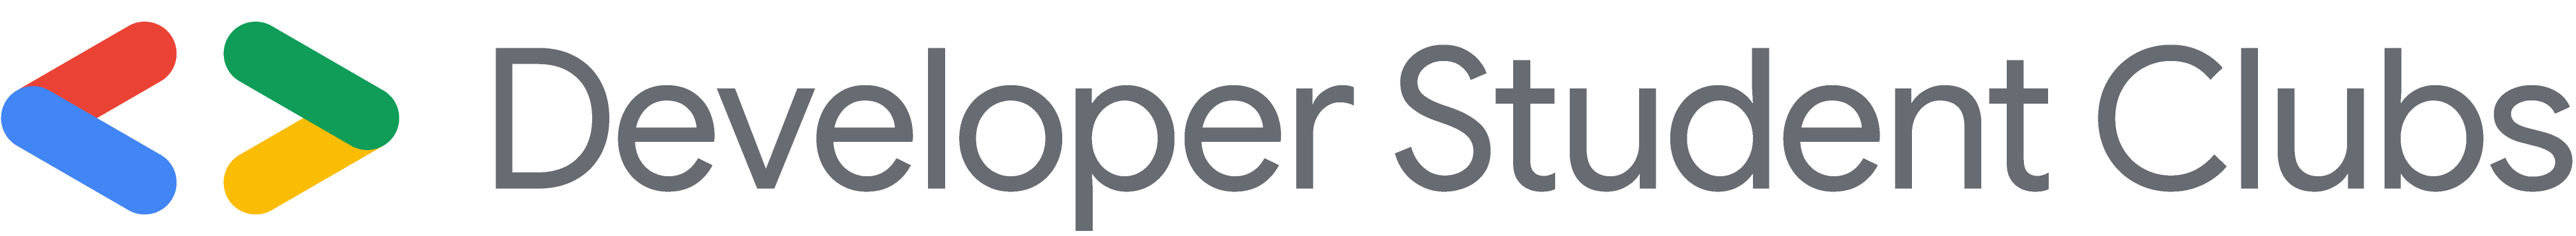

#**Titanic Dataset Using KNN:-**
this is a basic notebook to encourage students and make them understand the processes of data scientists 

##**Importing Libraries**
we imported ListedColormap to use a defined color map for the visulization

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
# data modeling
from sklearn.neighbors import KNeighborsClassifier

##**Getting the Data**
data is alread in the notebook data samples if you want the data you can download it at kaggle from this link :
https://www.kaggle.com/c/titanic

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

##**Describing data**

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q


In [7]:
print(train_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


identify categorical data to drop from the data set 

In [8]:
#categorical typing
categorical=['Ticket', 'Cabin', 'Embarked', 'Sex', 'Name']
#categorical series 
categorical=train_df.dtypes==object
print(categorical)
#categorical list
categorical=list(set(train_df.columns)-set(train_df.describe().columns))
print(categorical)

PassengerId    False
Survived       False
Pclass         False
Name            True
Sex             True
Age            False
SibSp          False
Parch          False
Ticket          True
Fare           False
Cabin           True
Embarked        True
dtype: bool
['Sex', 'Embarked', 'Name', 'Cabin', 'Ticket']


see how many missing data are in the data set

In [9]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


##**Cleaning data**
this section we will return to in the next sessions

In [10]:
#drop categorical columns
train_df.drop(categorical,axis=1,inplace=True)
test_df.drop(categorical,axis=1,inplace=True)


In [11]:
#drop missing values 
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [12]:
#define the target and input 
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [14]:
# make sure there isn't any missing data
print(X_train.isnull().any()==True)

PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
dtype: bool


##**Visuliazing data**

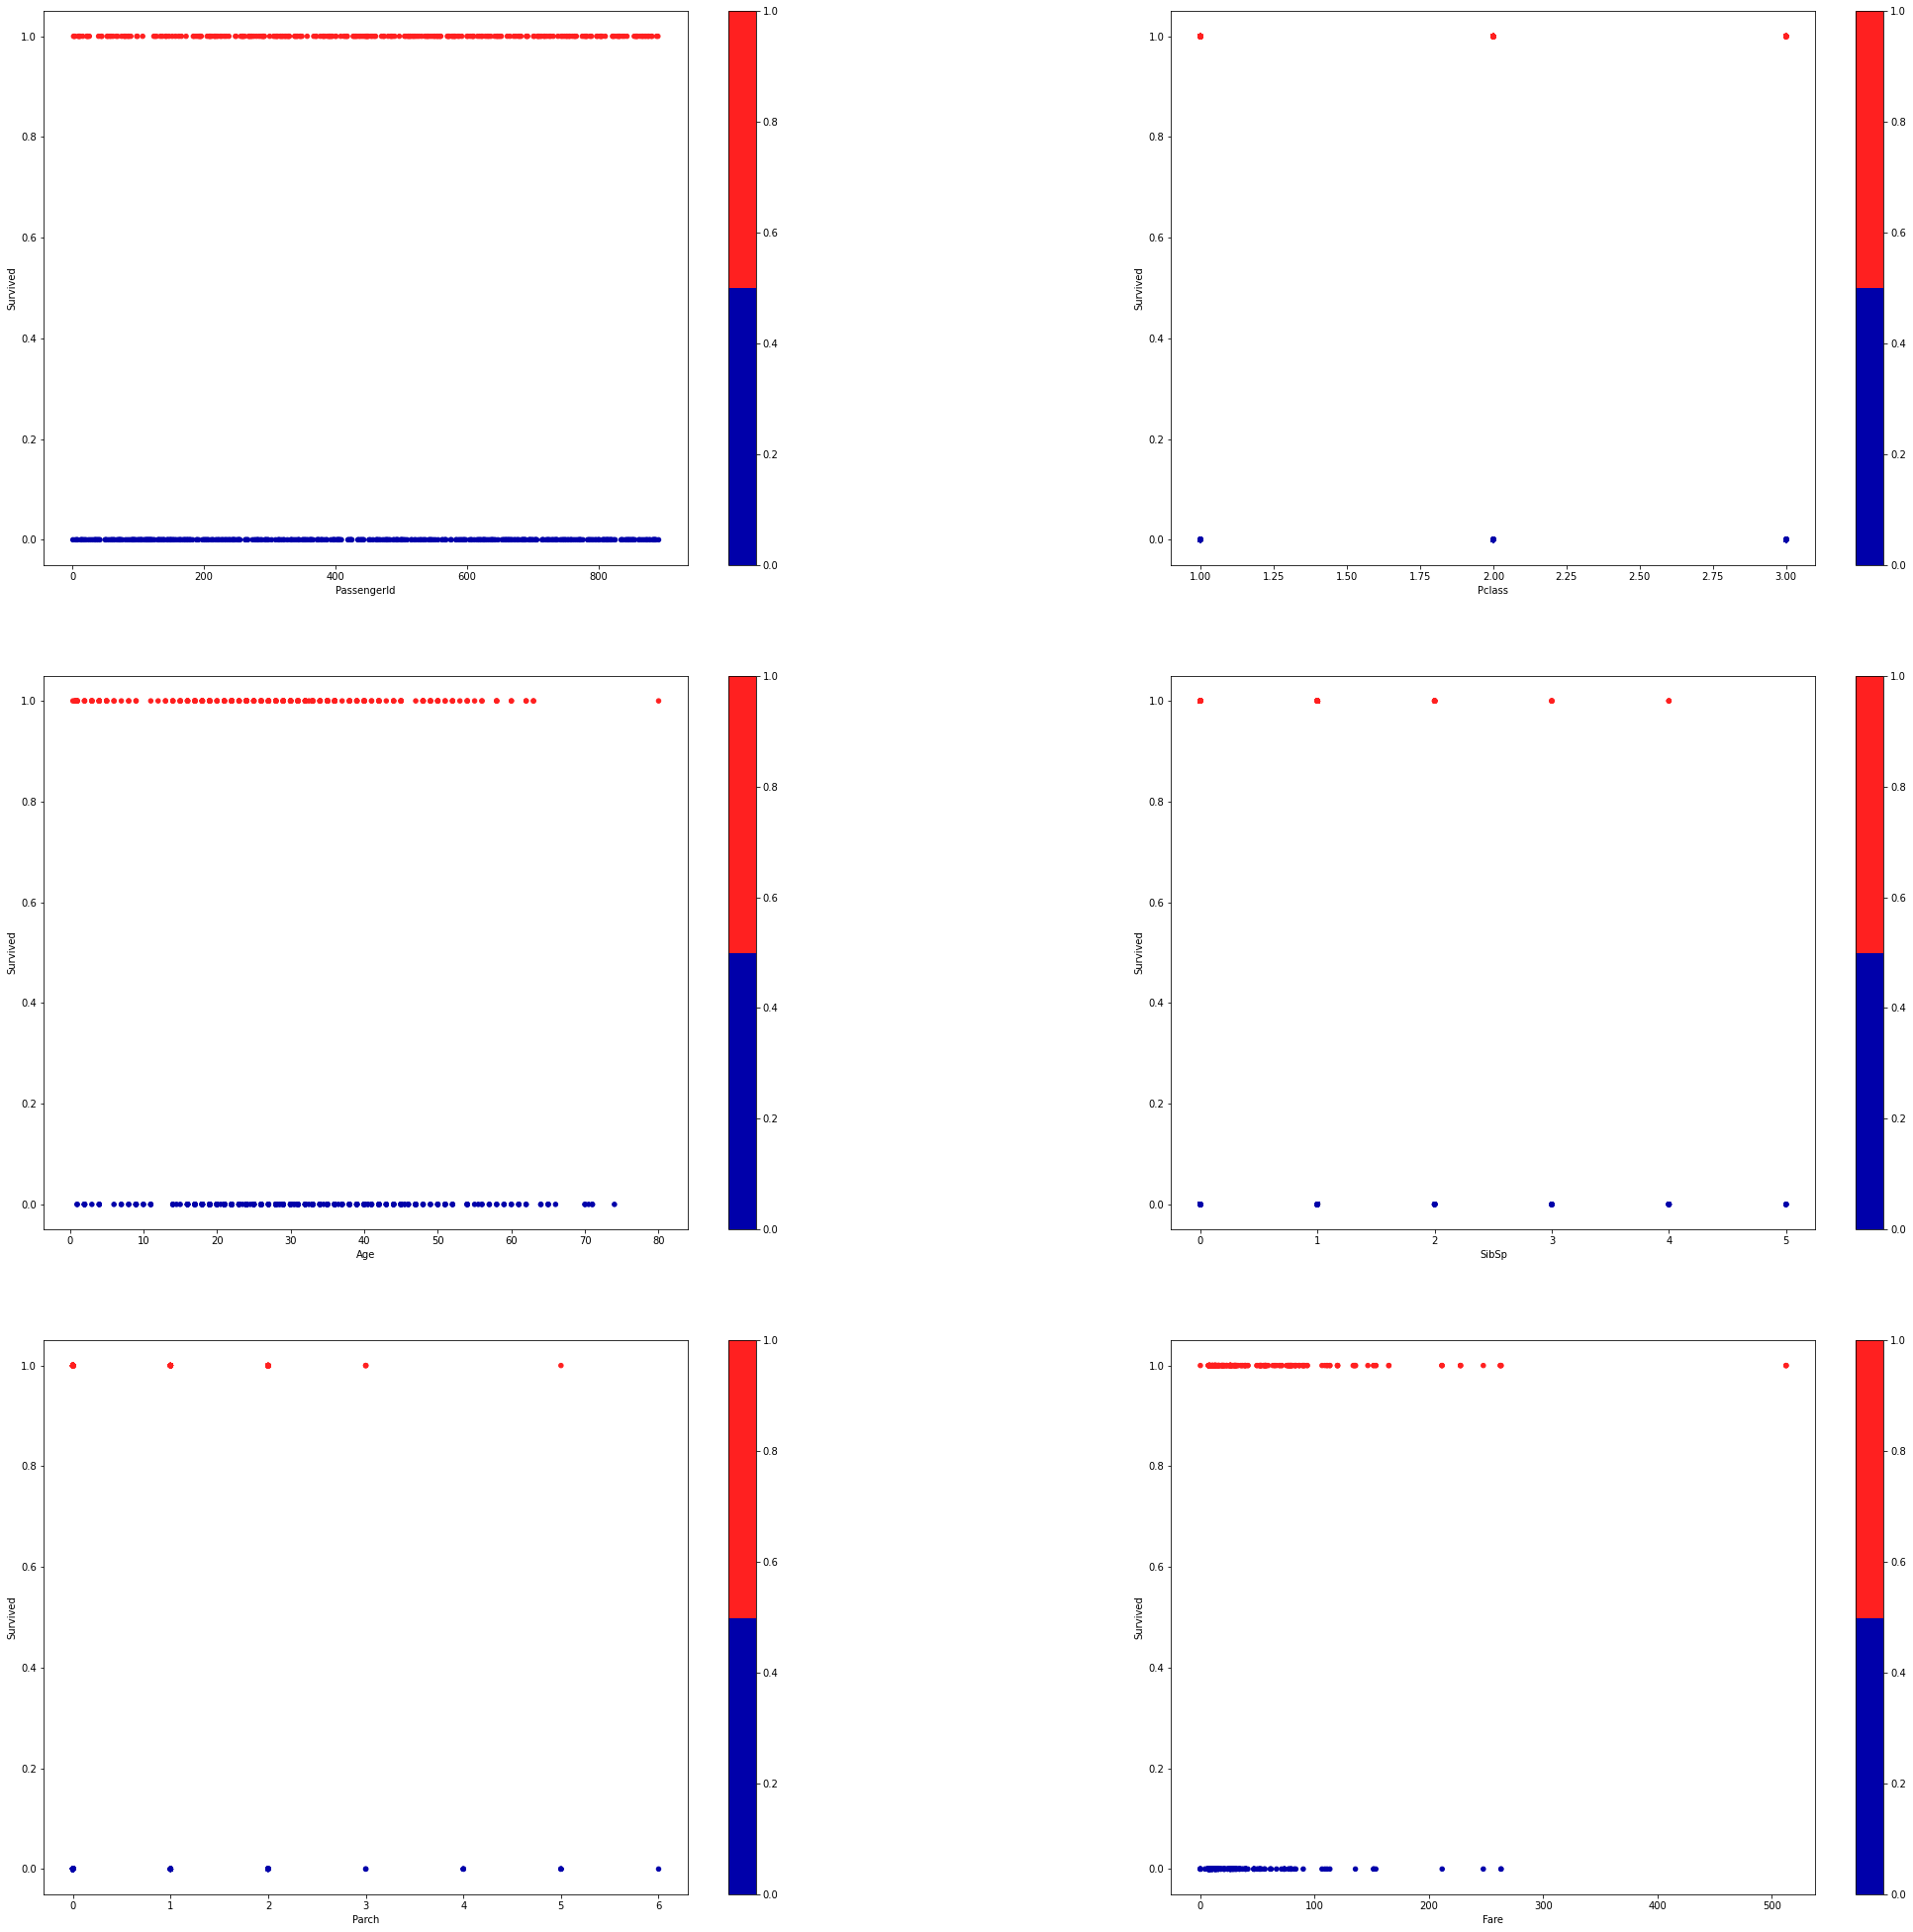

In [13]:
fig,axes=plt.subplots(3,2,figsize=(35,35))
fig.subplots_adjust(hspace=0.2, wspace=0.4)
for i,axs in zip(X_train.columns,axes.flat):
  train_df.plot(kind='scatter',x=str(i),y='Survived',stacked =True,ax=axs,marker='o',cmap=ListedColormap(['#0000aa', '#ff2020']),c=Y_train,legend=True)


##**Modeling data**
we model this data set with k-nearest neighbors (knn)

In [16]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test) 
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)

78.99
